In [6]:
!pip3 install imblearn

     |████████████████████████████████| 206 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 1.7 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [153]:
#basic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering

#metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import tree


#over-, under- sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [2]:
%matplotlib inline

In [3]:
#working dataset + delete column pep07 because no peps with this rule
df=pd.read_csv('Desktop/scoring.csv')
df = df.drop('PEP07', 1)
df

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP21,PEP22,PEP23,PEP24,PEP25,PEP26,PEP27,score,final_score,risk
0,0,9944,1,0,1,0,1,1,0,0,...,0,1,0,0,0,0,0,2.1,3.44,mid
1,1,6179,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
2,2,702,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
3,3,9970,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.8,1.31,low
4,4,6126,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.1,0.16,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9496,26254,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.7,1.15,low
9497,9497,26078,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.7,1.15,low
9498,9498,47966,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.9,1.48,low
9499,9499,33880,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.9,1.48,low


In [8]:
conditions = [
    (df['final_score'] <= 3),
    (df['final_score'] > 3)]
choices = ['low', 'high']
df['simple_risk'] = np.select(conditions, choices)

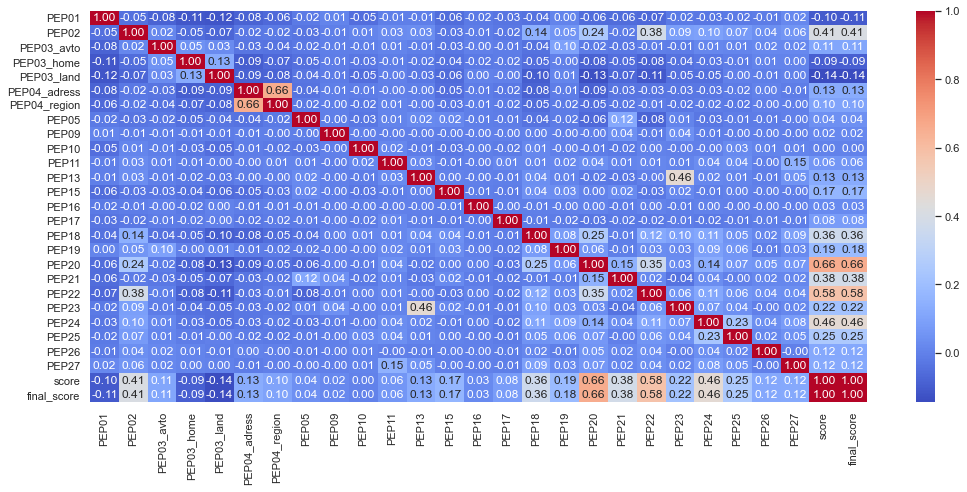

In [4]:
# Compute Correlation
corr = df.iloc[:, 2:].corr()

# Set plot area
plt.rcParams['figure.figsize'] = (15,7)
sns.set()

# Plot heatmap
sns.heatmap(corr, cmap="coolwarm", xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt=".2f")

# Visualize plot
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='final_score'>

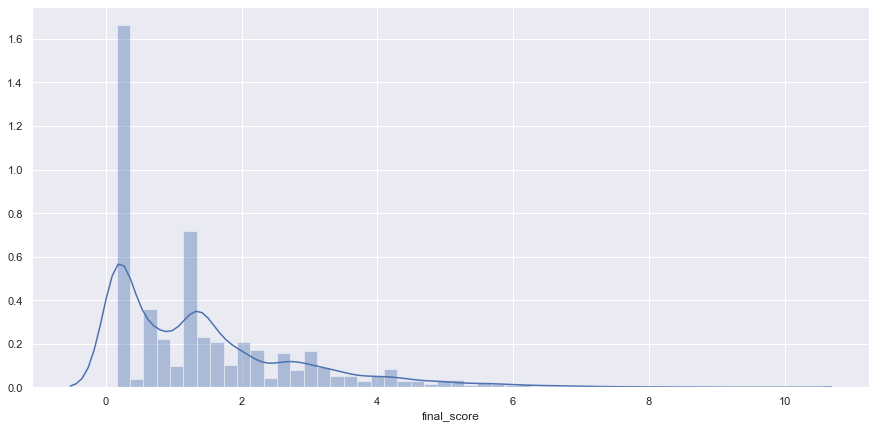

In [5]:
sns.distplot(df['final_score'], hist=True)

In [176]:
X=df.drop(columns=['id_PEP','score', 'final_score', 'risk', 'simple_risk', 'Unnamed: 0', 'new_r'], axis=1)
y=df['score']
y1=df['final_score']
y2=df['risk']
y3=df['simple_risk']
X

,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,PEP09,PEP10,...,PEP18,PEP19,PEP20,PEP21,PEP22,PEP23,PEP24,PEP25,PEP26,PEP27
0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Regression task (identify coeficients)

In [177]:
regression_model = LinearRegression(fit_intercept=True)

In [178]:
regression_model.fit(X, y1)

LinearRegression()

In [179]:
regression_model.coef_

array([0.16332282, 0.65620421, 0.65748261, 0.16387215, 0.16365627,
       1.14916903, 0.16291359, 0.65846599, 0.82036622, 0.32901886,
       0.32849707, 1.14753076, 1.31203883, 1.63990908, 1.31243318,
       0.65740946, 0.98287017, 1.31172856, 1.63945033, 1.31160291,
       0.81992812, 1.63955611, 1.14776406, 1.47561443, 0.49098171])

In [180]:
regression_model.score(X, y)

0.1571933230472159

In [181]:
tree_regr=DecisionTreeRegressor(random_state=1)
tree_regr.fit(X, y1)

DecisionTreeRegressor(random_state=1)

In [182]:
cross_val_score(tree_regr, X, y1, cv=5)

array([0.96647126, 0.93061795, 0.96203311, 0.92427533, 0.94657949])

## Classifcation task

In [14]:
#split for train-test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y2, random_state = 1)
Xtrain_s, Xtest_s, ytrain_s, ytest_s = train_test_split(X, y3, random_state = 1)

In [46]:
np.random.seed(1111)

models without over-, undersampling

In [62]:
# Algorithms
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('DTR', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=3, base_estimator=DecisionTreeClassifier(max_depth=1), random_state=1)))

In [48]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    


KNN: 0.872421 (0.005861)
DTR: 0.982316 (0.003478)
SVM: 0.876912 (0.009337)
LR: 0.966175 (0.006076)
AdaBoost: 0.930105 (0.002110)


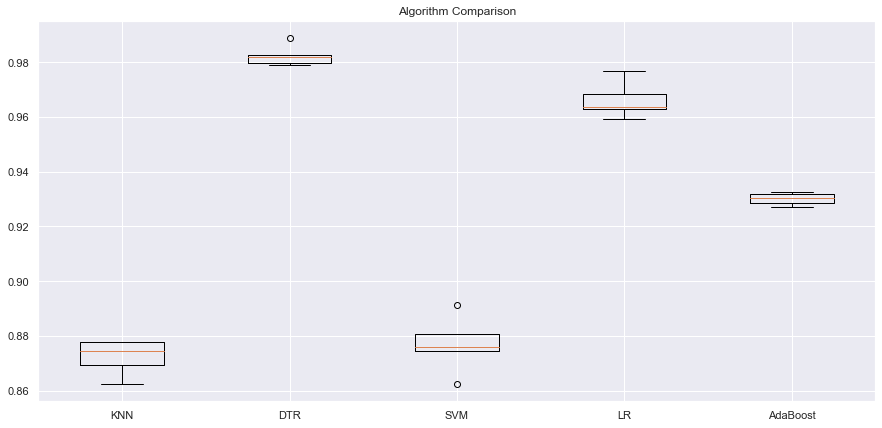

In [50]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [51]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)
dt_y=dt.predict(Xtest)

In [28]:
#not the best accuracy
print('Accuracy score:', dt.score(Xtest, ytest))
print(confusion_matrix(ytest, dt_y))
print(classification_report(ytest, dt_y))

Accuracy score: 0.984006734006734
[[   1    0    8]
 [   0 2075    6]
 [   6   18  262]]
              precision    recall  f1-score   support

        high       0.14      0.11      0.12         9
         low       0.99      1.00      0.99      2081
         mid       0.95      0.92      0.93       286

    accuracy                           0.98      2376
   macro avg       0.69      0.67      0.68      2376
weighted avg       0.98      0.98      0.98      2376



## Work with data

In [52]:
#undersampling
undersample = RandomUnderSampler(sampling_strategy='majority')
Xtrain_under, ytrain_under = undersample.fit_resample(Xtrain, ytrain)
Xtrain_under_s, ytrain_under_s = undersample.fit_resample(Xtrain_s, ytrain_s)

In [53]:
#oversampling smote
sm = SMOTE(random_state=42)
Xtrain_sm, ytrain_sm = sm.fit_resample(Xtrain, ytrain)
Xtrain_sm_s, ytrain_sm_s = sm.fit_resample(Xtrain_s, ytrain_s)

In [54]:
#oversampling random
oversample = RandomOverSampler(sampling_strategy='minority')
Xtrain_over, ytrain_over=oversample.fit_resample(Xtrain, ytrain)
Xtrain_over_s, ytrain_over_s=oversample.fit_resample(Xtrain_s, ytrain_s)

### Results for undersample

In [58]:
results_under = []

for name, model in models:
    cv_results_under = cross_val_score(model, Xtrain_under, ytrain_under, cv=kfold, scoring='accuracy')
    results_under.append(cv_results_under)
    print('%s: %f (%f)' % (name, cv_results_under.mean(), cv_results_under.std()))

KNN: 0.938843 (0.010171)
DTR: 0.946970 (0.018462)
SVM: 0.938843 (0.010171)
LR: 0.942919 (0.011791)
AdaBoost: 0.935787 (0.011857)


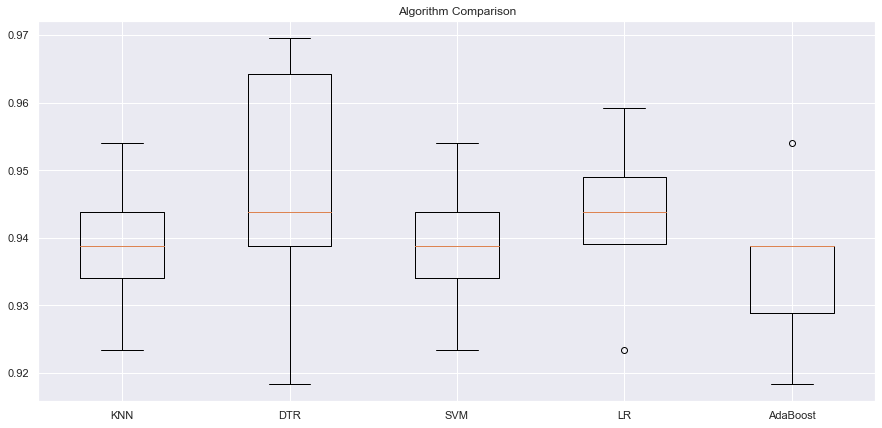

In [59]:
plt.boxplot(results_under, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [65]:
dt.fit(Xtrain_under, ytrain_under)
dt_y=dt.predict(Xtest)

print(confusion_matrix(ytest, dt_y))
print(classification_report(ytest, dt_y))

[[   4    0    5]
 [   0 1602  479]
 [   6    3  277]]
              precision    recall  f1-score   support

        high       0.40      0.44      0.42         9
         low       1.00      0.77      0.87      2081
         mid       0.36      0.97      0.53       286

    accuracy                           0.79      2376
   macro avg       0.59      0.73      0.61      2376
weighted avg       0.92      0.79      0.83      2376



## Results for oversample (SMOTE)

In [69]:
results_over = []

for name, model in models:
    cv_results_over = cross_val_score(model, Xtrain_sm, ytrain_sm, cv=kfold, scoring='accuracy')
    results_over.append(cv_results_over)
    print('%s: %f (%f)' % (name, cv_results_over.mean(), cv_results_over.std()))

KNN: 0.706781 (0.009313)
DTR: 0.918043 (0.002004)
SVM: 0.735666 (0.008109)
LR: 0.833550 (0.007218)
AdaBoost: 0.815031 (0.006987)


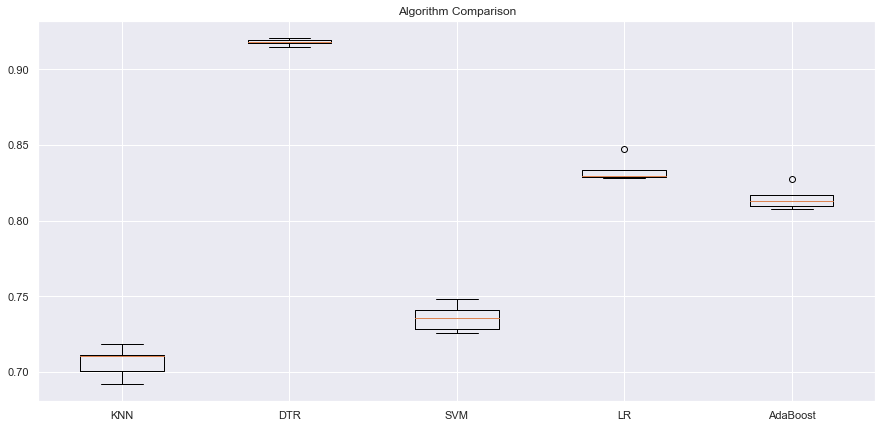

In [70]:
plt.boxplot(results_over, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [71]:
dt.fit(Xtrain_sm, ytrain_sm)
dt_y=dt.predict(Xtest)

print(confusion_matrix(ytest, dt_y))
print(classification_report(ytest, dt_y))

[[   1    0    8]
 [   2 1831  248]
 [  24   47  215]]
              precision    recall  f1-score   support

        high       0.04      0.11      0.06         9
         low       0.97      0.88      0.92      2081
         mid       0.46      0.75      0.57       286

    accuracy                           0.86      2376
   macro avg       0.49      0.58      0.52      2376
weighted avg       0.91      0.86      0.88      2376



## Results for oversample (Random)

In [90]:
results_over_r = []

for name, model in models:
    cv_results_over_r = cross_val_score(model, Xtrain_over, ytrain_over, cv=kfold, scoring='accuracy')
    results_over_r.append(cv_results_over_r)
    
    model.fit(Xtrain_over, ytrain_over)
    
    print('%s: %f (%f)' % (name, cv_results_over_r.mean(), cv_results_over_r.std()))
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print(classification_report(ytest, model.predict(Xtest)))

KNN: 0.928104 (0.003374)
[[   2    7    0]
 [   8 2009   64]
 [  18  205   63]]
              precision    recall  f1-score   support

        high       0.07      0.22      0.11         9
         low       0.90      0.97      0.93      2081
         mid       0.50      0.22      0.31       286

    accuracy                           0.87      2376
   macro avg       0.49      0.47      0.45      2376
weighted avg       0.85      0.87      0.86      2376

DTR: 0.991484 (0.001229)
[[   1    0    8]
 [   0 2071   10]
 [   2   19  265]]
              precision    recall  f1-score   support

        high       0.33      0.11      0.17         9
         low       0.99      1.00      0.99      2081
         mid       0.94      0.93      0.93       286

    accuracy                           0.98      2376
   macro avg       0.75      0.68      0.70      2376
weighted avg       0.98      0.98      0.98      2376

SVM: 0.934660 (0.002675)
[[   2    7    0]
 [   3 2036   42]
 [   8  216   62]

/Users/tonyashka/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tonyashka/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tonyashka/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


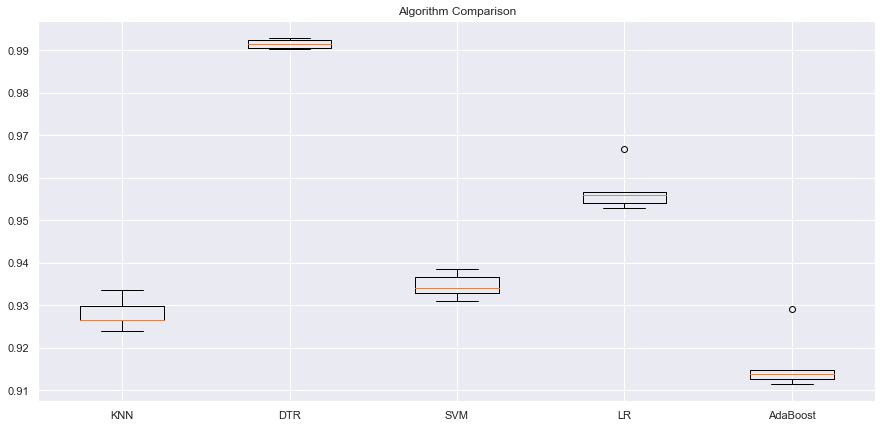

In [85]:
plt.boxplot(results_over_r, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [74]:
dt.fit(Xtrain_over, ytrain_over)
dt_y=dt.predict(Xtest)

print(confusion_matrix(ytest, dt_y))
print(classification_report(ytest, dt_y))

[[   1    0    8]
 [   0 2070   11]
 [   2   21  263]]
              precision    recall  f1-score   support

        high       0.33      0.11      0.17         9
         low       0.99      0.99      0.99      2081
         mid       0.93      0.92      0.93       286

    accuracy                           0.98      2376
   macro avg       0.75      0.68      0.70      2376
weighted avg       0.98      0.98      0.98      2376



## Pipeline usage (mixed)

In [77]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', dt)]
pipe_dt = Pipeline(steps=steps)

pipe_dt.fit(Xtrain, ytrain)
y_pipe_dt=pipe_dt.predict(Xtest)

print(pipe_dt.score(Xtest, ytest))
print(confusion_matrix(ytest, dt_y))
print(classification_report(ytest, dt_y))

0.9852693602693603
[[   1    0    8]
 [   0 2070   11]
 [   2   21  263]]
              precision    recall  f1-score   support

        high       0.33      0.11      0.17         9
         low       0.99      0.99      0.99      2081
         mid       0.93      0.92      0.93       286

    accuracy                           0.98      2376
   macro avg       0.75      0.68      0.70      2376
weighted avg       0.98      0.98      0.98      2376



In [89]:
results_pipe = []

for name, model in models:
    
    over = RandomOverSampler(sampling_strategy='minority')
    under = RandomUnderSampler(sampling_strategy='majority')
    steps = [('o', over), ('u', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    
    cv_results_pipe = cross_val_score(pipeline, Xtrain, ytrain, cv=kfold, scoring='accuracy')
    results_pipe.append(cv_results_pipe)
    
    pipeline.fit(Xtrain, ytrain)
    
    print('%s: %f (%f)' % (name, cv_results_pipe.mean(), cv_results_pipe.std()))
    print(confusion_matrix(ytest, pipeline.predict(Xtest)))
    print(classification_report(ytest, pipeline.predict(Xtest)))

KNN: 0.863439 (0.004668)
[[   2    7    0]
 [   8 2009   64]
 [  18  205   63]]
              precision    recall  f1-score   support

        high       0.07      0.22      0.11         9
         low       0.90      0.97      0.93      2081
         mid       0.50      0.22      0.31       286

    accuracy                           0.87      2376
   macro avg       0.49      0.47      0.45      2376
weighted avg       0.85      0.87      0.86      2376

DTR: 0.981193 (0.003243)
[[   0    0    9]
 [   0 2073    8]
 [   2   22  262]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         9
         low       0.99      1.00      0.99      2081
         mid       0.94      0.92      0.93       286

    accuracy                           0.98      2376
   macro avg       0.64      0.64      0.64      2376
weighted avg       0.98      0.98      0.98      2376

SVM: 0.874947 (0.009677)
[[   2    7    0]
 [   3 2036   42]
 [   8  216   62]

## work with lower number of labels 

In [108]:
results_pipe_lower = []

for name, model in models:
    
    over = RandomOverSampler(sampling_strategy='minority')
    under = RandomUnderSampler(sampling_strategy='majority')
    steps = [('o', over), ('u', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    
    cv_results_pipe_lower = cross_val_score(pipeline, Xtrain_s, ytrain_s, cv=kfold, scoring='accuracy')
    results_pipe_lower.append(cv_results_pipe_lower)
    
    pipeline.fit(Xtrain_s, ytrain_s)
    
    print('%s: %f (%f)' % (name, cv_results_pipe_lower.mean(), cv_results_pipe_lower.std()))
    print(confusion_matrix(ytest_s, pipeline.predict(Xtest_s)))
    print(classification_report(ytest_s, pipeline.predict(Xtest_s)))


KNN: 0.730807 (0.011881)
[[ 148  147]
 [ 470 1611]]
              precision    recall  f1-score   support

        high       0.24      0.50      0.32       295
         low       0.92      0.77      0.84      2081

    accuracy                           0.74      2376
   macro avg       0.58      0.64      0.58      2376
weighted avg       0.83      0.74      0.78      2376

DTR: 0.983018 (0.003023)
[[ 273   22]
 [  12 2069]]
              precision    recall  f1-score   support

        high       0.96      0.93      0.94       295
         low       0.99      0.99      0.99      2081

    accuracy                           0.99      2376
   macro avg       0.97      0.96      0.97      2376
weighted avg       0.99      0.99      0.99      2376

SVM: 0.794246 (0.006544)
[[ 143  152]
 [ 334 1747]]
              precision    recall  f1-score   support

        high       0.30      0.48      0.37       295
         low       0.92      0.84      0.88      2081

    accuracy              

In [109]:
over = RandomOverSampler(sampling_strategy='minority')
under = RandomUnderSampler(sampling_strategy='majority')
steps = [('o', over), ('u', under), ('model', dt)]
pipeline = Pipeline(steps=steps)

y=pipeline.fit(Xtrain_s, ytrain_s)
print('%s: %f (%f)' % (name, cv_results_pipe_lower.mean(), cv_results_pipe_lower.std()))
print(confusion_matrix(ytest_s, pipeline.predict(Xtest_s)))
print(classification_report(ytest_s, pipeline.predict(Xtest_s)))


AdaBoost: 0.821895 (0.014233)
[[ 265   30]
 [  12 2069]]
              precision    recall  f1-score   support

        high       0.96      0.90      0.93       295
         low       0.99      0.99      0.99      2081

    accuracy                           0.98      2376
   macro avg       0.97      0.95      0.96      2376
weighted avg       0.98      0.98      0.98      2376



In [112]:
df['new_r']=pipeline.predict(X)
df

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP23,PEP24,PEP25,PEP26,PEP27,score,final_score,risk,simple_risk,new_r
0,0,9944,1,0,1,0,1,1,0,0,...,0,0,0,0,0,2.1,3.44,mid,high,high
1,1,6179,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.1,0.16,low,low,low
2,2,702,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.1,0.16,low,low,low
3,3,9970,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0.8,1.31,low,low,low
4,4,6126,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.1,0.16,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9496,9496,26254,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.7,1.15,low,low,low
9497,9497,26078,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.7,1.15,low,low,low
9498,9498,47966,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.9,1.48,low,low,low
9499,9499,33880,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.9,1.48,low,low,low


In [118]:
df_new=df[df['new_r']=='high']
df_new

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP23,PEP24,PEP25,PEP26,PEP27,score,final_score,risk,simple_risk,new_r
0,0,9944,1,0,1,0,1,1,0,0,...,0,0,0,0,0,2.1,3.44,mid,high,high
69,69,5022,1,0,0,0,0,0,0,0,...,1,1,0,0,0,2.0,3.28,mid,high,high
87,87,15372,1,1,0,0,0,0,0,0,...,1,0,0,0,0,2.5,4.10,mid,high,high
105,105,26333,1,0,0,0,0,1,0,0,...,0,0,0,0,0,2.4,3.93,mid,high,high
145,145,16966,1,1,0,0,1,0,0,0,...,0,1,0,0,0,2.4,3.93,mid,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080,9080,43668,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.8,4.59,mid,high,high
9084,9084,43968,0,0,0,0,0,0,0,0,...,0,1,0,0,0,2.8,4.59,mid,high,high
9091,9091,12921,0,0,0,0,0,0,0,0,...,1,1,0,0,0,2.5,4.10,mid,high,high
9158,9158,34575,0,0,0,0,0,0,0,0,...,0,1,1,0,0,2.5,4.10,mid,high,high


In [166]:
X_n=df_new.drop(columns=['id_PEP','score', 'final_score', 'risk', 'simple_risk', 'new_r'], axis=1)
y_n=df_new['new_r']
y_n1=df_new['final_score']
X_n=X_n.drop(columns=['Unnamed: 0'])

In [152]:
#does not provide accurate results
clustering = AgglomerativeClustering(n_clusters = 3, linkage = 'single').fit(X_n)
X_n['clusters'] = clustering.labels_
X_n['clusters'] = X_n['clusters'].astype('category')
X_n

/Users/tonyashka/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


,Unnamed: 0,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,PEP09,...,PEP19,PEP20,PEP21,PEP22,PEP23,PEP24,PEP25,PEP26,PEP27,clusters
0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2
69,69,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
87,87,1,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,2
105,105,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,2
145,145,1,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080,9080,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
9084,9084,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
9091,9091,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
9158,9158,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0


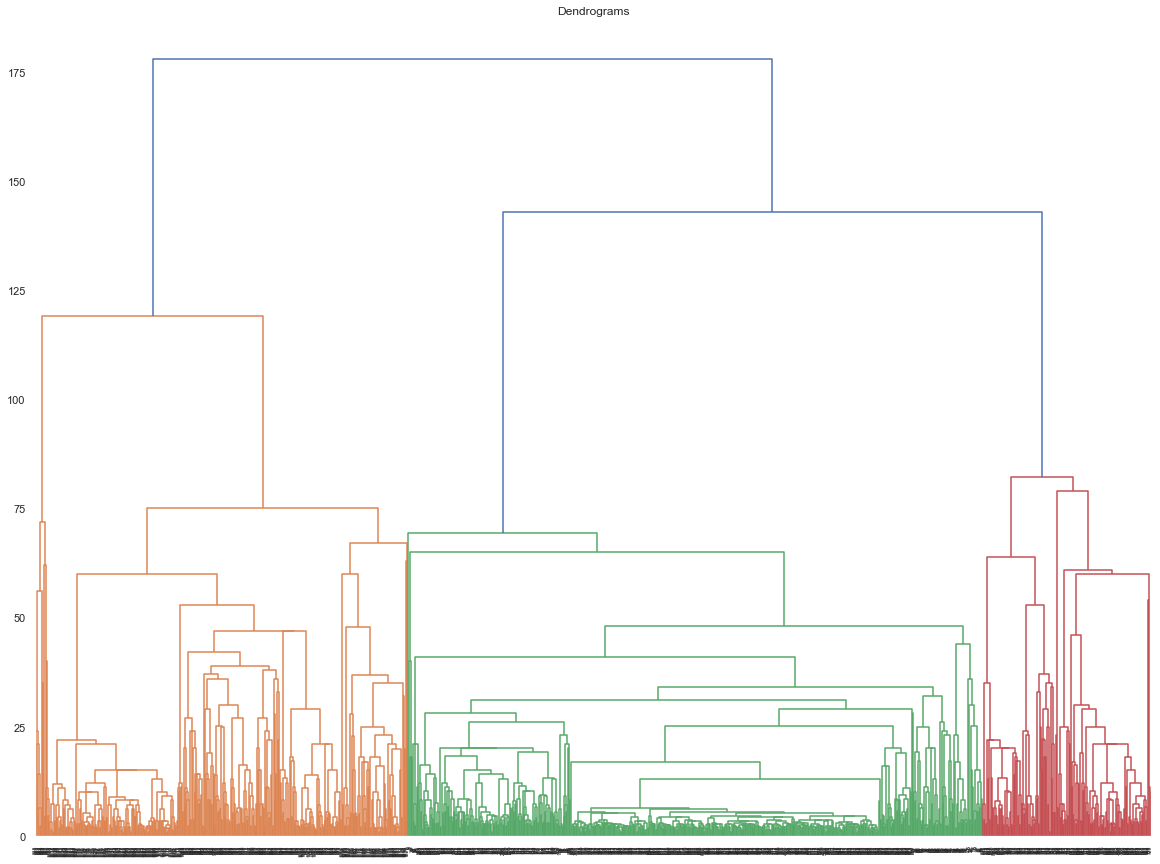

In [141]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_n, method='single'))

In [183]:
df_new['new_scores']=tree_regr.predict(X_n)

<ipython-input-183-97911434ef20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['new_scores']=tree_regr.predict(X_n)


In [184]:
df_new

,Unnamed: 0,id_PEP,PEP01,PEP02,PEP03_avto,PEP03_home,PEP03_land,PEP04_adress,PEP04_region,PEP05,...,PEP24,PEP25,PEP26,PEP27,score,final_score,risk,simple_risk,new_r,new_scores
0,0,9944,1,0,1,0,1,1,0,0,...,0,0,0,0,2.1,3.44,mid,high,high,3.44
69,69,5022,1,0,0,0,0,0,0,0,...,1,0,0,0,2.0,3.28,mid,high,high,3.28
87,87,15372,1,1,0,0,0,0,0,0,...,0,0,0,0,2.5,4.10,mid,high,high,4.10
105,105,26333,1,0,0,0,0,1,0,0,...,0,0,0,0,2.4,3.93,mid,high,high,3.93
145,145,16966,1,1,0,0,1,0,0,0,...,1,0,0,0,2.4,3.93,mid,high,high,3.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9080,9080,43668,0,0,0,0,0,0,0,0,...,1,0,0,0,2.8,4.59,mid,high,high,4.59
9084,9084,43968,0,0,0,0,0,0,0,0,...,1,0,0,0,2.8,4.59,mid,high,high,4.59
9091,9091,12921,0,0,0,0,0,0,0,0,...,1,0,0,0,2.5,4.10,mid,high,high,4.10
9158,9158,34575,0,0,0,0,0,0,0,0,...,1,1,0,0,2.5,4.10,mid,high,high,4.10
